In [1]:
# Attempting to import everything I need in one go

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
to_drop = [
'date', # All houses were sold in 2014 and 2015
'view',
'sqft_above',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15'
]

data = data.drop(to_drop, axis=1)

In [6]:
data.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,0.0,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,400.0,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,0.0,1933


In [7]:
data.set_index('id', append=True, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21597 entries, (0, 7129300520) to (21596, 1523300157)
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.6+ MB


In [9]:
# Assuming NaN is NO
data['waterfront'].fillna('NO', inplace=True)

In [10]:
# Is this binary encoding?

data['waterfront'] = data['waterfront'].map({'YES': 1, 'NO': 0})

In [11]:
data.head(3)

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
,id,,,,,,,,,,,
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,0.0,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,400.0,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,0.0,1933


In [12]:
grade_strings = data['grade']

In [13]:
# Convert the 'grade' entries to integers

data['grade'] = [int(grade_strings.iloc[i][0]) for i in range(len(data['grade']))]
data.head()

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
,id,,,,,,,,,,,
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,Average,7,0.0,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,Average,7,400.0,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,Average,6,0.0,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7,910.0,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,Average,8,0.0,1987


In [14]:
data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
# Is this essentially ordinal encoding?

condition_dict = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

data['condition'] = data['condition'].map(condition_dict)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21597 entries, (0, 7129300520) to (21596, 1523300157)
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 2.6+ MB


In [17]:
# Why is sqft_basement an object
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [18]:
# How many entries have '?' for sqft_basement? 454.
data.query('sqft_basement == "?"')

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
,id,,,,,,,,,,,
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,3,7,?,1995
18,16000397,189000.0,2,1.00,1200,9850,1.0,0,4,7,?,1921
42,7203220400,861990.0,5,2.75,3595,5639,2.0,0,3,9,?,2014
79,1531000030,720000.0,4,2.50,3450,39683,2.0,0,3,1,?,2002
112,2525310310,272500.0,3,1.75,1540,12600,1.0,0,4,7,?,1980
...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,504600.0,5,3.00,2360,5000,1.0,0,3,7,?,2008
21447,1760650900,337500.0,4,2.50,2330,4907,2.0,0,3,7,?,2013
21473,6021503707,352500.0,2,2.50,980,1010,3.0,0,3,8,?,2008


In [19]:
# Where sqft_basement is '?', that doesn't necessarily mean there is no basement.
# Dropping sqft_basement because I can't impute it with another value.
data.drop('sqft_basement', axis=1, inplace=True)

In [20]:
# data_cat = data.select_dtypes('object')

In [21]:
# data_cat.head(3)

In [22]:
# data_cat_dummies = pd.get_dummies(data_cat, drop_first=True)
# data_cat_dummies.sample(5)

In [23]:
# data_cat_dummies = data_cat_dummies.astype('float')

In [24]:
# data_num = data.select_dtypes(include='number')
# data_num.head(5)

In [25]:
# data_with_dummies = pd.concat([data_num, data_cat_dummies], axis=1)
# data_with_dummies.head(10)

In [26]:
data.head()

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
,id,,,,,,,,,,
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987


**All data is now numeric. We can consider waterfront a categorical variable.
Unsure if I should consider condition and grade as categoricals, too.**

In [27]:
data.query('bedrooms > 8')

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
,id,,,,,,,,,,
4092,1997200215,599999.0,9,4.50,3830,6988,2.5,0,3,7,1938
4231,2902200015,700000.0,9,3.00,3680,4400,2.0,0,3,7,1908
6073,9822700190,1280000.0,9,4.50,3650,5000,2.0,0,3,8,1915
8537,424049043,450000.0,9,7.50,4050,6504,2.0,0,3,7,1996
8748,1773100755,520000.0,11,3.00,3000,4960,2.0,0,3,7,1918
13301,627300145,1150000.0,10,5.25,4590,10920,1.0,0,3,9,2008
15147,5566100170,650000.0,10,2.00,3610,11914,2.0,0,4,7,1958
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1947
16830,8823900290,1400000.0,9,4.00,4620,5508,2.5,0,3,1,1915


In [28]:
# The house with 33 bedrooms is clearly an error, given its the square footage an bathroom count.

data.drop(index=15856, inplace=True)

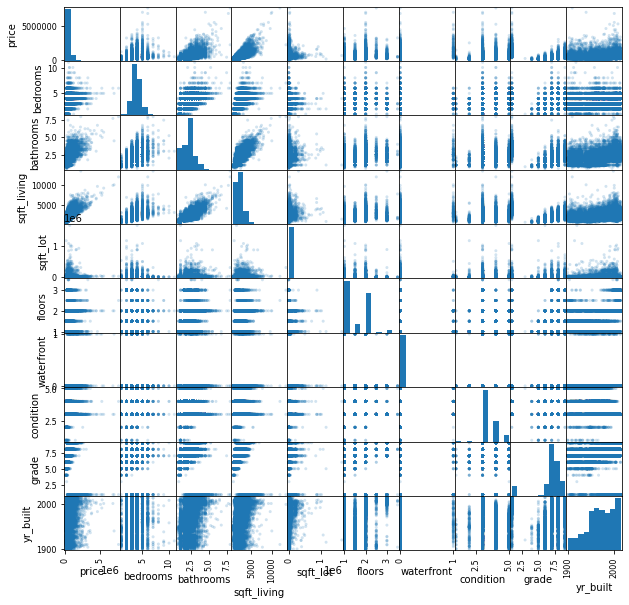

In [76]:
pd.plotting.scatter_matrix(data, figsize=(10,10), alpha=.2);

<AxesSubplot:>

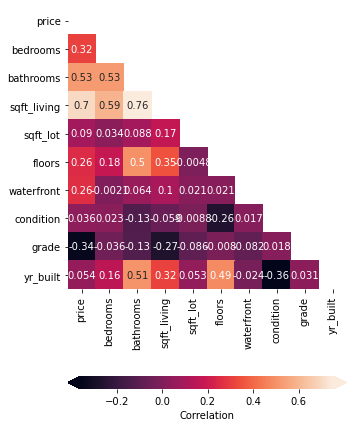

In [30]:
fig, ax = plt.subplots(figsize = (5,8))

sns.heatmap(
    data=data.corr(),
    mask=np.triu(np.ones_like(data.corr(), dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

Text(0, 0.5, 'Price')

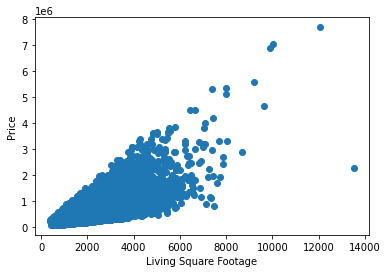

In [31]:
plt.scatter(x=data['sqft_living'], y=data['price'])
plt.xlabel('Living Square Footage')
plt.ylabel('Price')

In [60]:
y = data['price']
X = data.drop(['price'], axis=1)
X = sm.add_constant(X)

C:\Users\zshoo\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
crude_model = sm.OLS(y, X).fit()
crude_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3612.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:30:57   Log-Likelihood:            -2.9746e+05
No. Observations:               21596   AIC:                         5.949e+05
Df Residuals:                   21586   BIC:                         5.950e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.764e+06   1.37e+05     41.996      0.000    5.49e+06    6.03e+06
bedrooms    -5.919e+04   2259.341    -26.198      0.000   -6.36e+04   -5.48e+04
bathrooms    6.915e+04   3667.029     18.858      0.000     6.2e+04    7.63e+04
sqft_living   271.4590      3.004     90.373      0.000     265.571     277.347
sqft_lot       -0.3272      0.039     -8.381      0.000      -0.404      -0.251
floors       6.093e+04   3621.000     16.826      0.000    5.38e+04     6.8e+04
waterfront   7.454e+05   1.95e+04     38.225      0.000    7.07e+05    7.84e+05
condition    2.073e+04   2643.439      7.843      0.000    1.56e+04    2.59e+04
grade        -2.39e+04    884.752    -27.010      0.000   -2.56e+04   -2.22e+04
yr_built    -2907.6469     69.800    -41.657      0.000   -3044.460   -2770.834
==============================================================================
Omnibus:                    12548.142   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409412.779
Skew:                           2.234   Prob(JB):                         0.00
Kurtosis:                      23.857   Cond. No.                     3.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
y_pred = crude_model.predict(X)

In [63]:
mean_squared_error(y, y_pred)

53853240115.22749

In [64]:
# Idk what I'm doing here

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
y_train_pred = lr.predict(X_train)

In [69]:
y_test_pred = lr.predict(X_test)

In [70]:
mean_squared_error(y_train, y_train_pred)

51688098576.00383

In [72]:
mean_squared_error(y_test, y_test_pred)

60457289150.879585

In [75]:
X['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64